In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wc= pd.read_csv(r"C:Datafiles/area.csv")

In [3]:
wc.head()

,area,prices
0,1000,316404.1096
1,1500,384297.9452
2,2300,492928.0822
3,3540,661304.7945
4,4120,740061.6438


In [4]:
 wc.shape


(23, 2)

In [5]:
wc.tail(3)


,area,prices
20,4700,3.457217e+06
21,7700,9.543012e+06
22,8900,5.478652e+05


In [6]:
wc.columns


Index(['area', 'prices'], dtype='object')

In [7]:
type(wc)


pandas.core.frame.DataFrame

In [8]:
import seaborn as sns


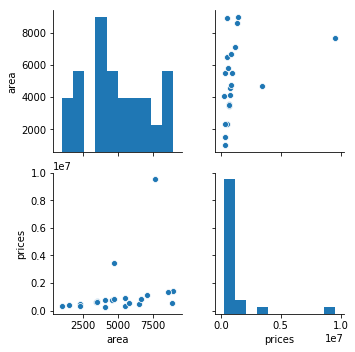

In [9]:
sns.pairplot(wc.iloc[:,:])


In [10]:
import statsmodels.formula.api as smf


In [15]:
ml1 = smf.ols("area ~ prices", data = wc).fit()


In [16]:
ml1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   area   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     2.810
Date:                Mon, 10 Jun 2019   Prob (F-statistic):              0.108
Time:                        11:46:44   Log-Likelihood:                -209.15
No. Observations:                  23   AIC:                             422.3
Df Residuals:                      21   BIC:                             424.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4438.6418    554.088      8.011      0.000    3286.353    5590.931
prices         0.0004      0.000      1.676      0.108      -0.000       0.001
==============================================================================
Omnibus:                        1.130   Durbin-Watson:                   0.986
Prob(Omnibus):                  0.568   Jarque-Bera (JB):                1.061
Skew:                           0.397   Prob(JB):                        0.588
Kurtosis:                       2.311   Cond. No.                     2.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X= wc.iloc[:,:-1]
X

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


In [18]:
y = wc.iloc[:,1]
y


0     3.164041e+05
1     3.842979e+05
2     4.929281e+05
3     6.613048e+05
4     7.400616e+05
5     7.998082e+05
6     9.260908e+05
7     6.504418e+05
8     8.256079e+05
9     4.929281e+05
10    1.402705e+06
11    1.348390e+06
12    1.144709e+06
13    5.118222e+05
14    3.459127e+05
15    3.476298e+05
16    6.589325e+05
17    2.346532e+05
18    8.345613e+05
19    5.823945e+05
20    3.457217e+06
21    9.543012e+06
22    5.478652e+05
Name: prices, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18, 1)
(5, 1)
(18,)
(5,)


In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
print(regressor.intercept_)
regressor.coef_

361603.5613068432


array([59.59415791])

In [23]:
y_pred = regressor.predict(X_test)
y_pred

array([874113.31933611, 897950.98250027, 820478.57721677, 689371.42981393,
       641696.10348563])

In [24]:
y_pred == y_test


11    False
10    False
21    False
14    False
20    False
Name: prices, dtype: bool

In [25]:
np.mean(y_pred)


784722.0824705428

In [26]:
np.mean(y_test)


3219447.6235999996

Text(0, 0.5, 'AT')

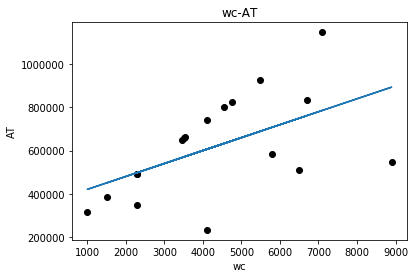

In [31]:
plt.scatter(X_train, y_train, color = "black")
plt.plot(X_train, regressor.predict(X_train))
plt.title('wc-AT')
plt.xlabel("wc")
plt.ylabel("AT")

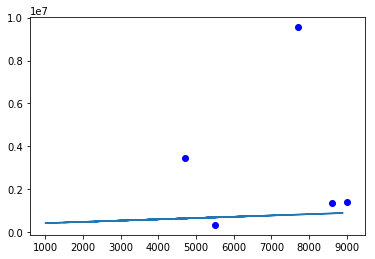

In [32]:
plt.plot(X_train, regressor.predict(X_train))
plt.scatter(X_test, y_test, color = "blue")

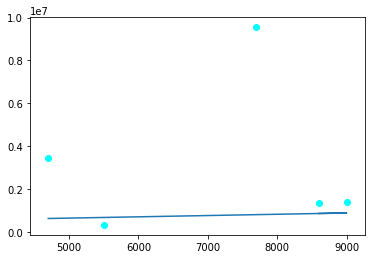

In [29]:
plt.plot(X_test, regressor.predict(X_test))
plt.scatter(X_test, y_test, color = "cyan")

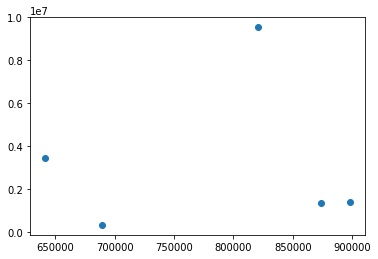

In [34]:
plt.scatter(y_pred, y_test)